In [31]:
np.set_printoptions(suppress=True)
from __future__ import division
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

[-103.41463503  -81.3642064  -104.41643652  -96.04607813  -89.44708515
  -96.097684   -101.86172548  -86.22865462 -106.69134749  -98.27258056]
[-104.24232416  -78.24060068 -104.77906586  -97.2757702   -89.0028545
  -92.82579881 -103.87315247  -86.10829827 -106.62276738  -99.12269239]


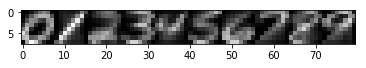

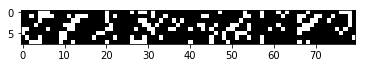

Train Accuracy 0.774142857143
Test Accuracy 0.76425


In [281]:
'''
Question 2.3 Skeleton Code

Here you should implement and evaluate the Naive Bayes classifier.
'''

import data
import numpy as np
# Import pyplot - plt.imshow is useful!
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
from __future__ import division

def binarize_data(pixel_values):
    '''
    Binarize the data by thresholding around 0.5
    '''
    return np.where(pixel_values > 0.5, 1.0, 0.0)

def compute_parameters(train_data, train_labels):
    '''
    Compute the eta MAP estimate/MLE with augmented data

    You should return a numpy array of shape (10, 64)
    where the ith row corresponds to the ith digit class.
    '''
    eta = np.zeros((10, 64))
    
    a = 2
    b = 2
    
    for i in range(10):
        num = train_data[train_labels == i].sum(0) + 2 - 1 
        denom = len(train_data[train_labels == i]) + a + b - 2
        eta[i] = num / denom
    
    return eta

def plot_images(class_images):
    '''
    Plot each of the images corresponding to each class side by side in grayscale
    '''
    classImgs = []
    
    for i in range(10):
        img_i = class_images[i]
        # ...
        classImgs.append(img_i.reshape(8,8))

    all_concat = np.concatenate(classImgs, 1)
    plt.imshow(all_concat, cmap='gray')
    plt.show()

def generate_new_data(eta):
    '''
    Sample a new data point from your generative distribution p(x|y,theta) for
    each value of y in the range 0...10

    Plot these values
    '''
        
    
    generated_data = np.zeros((10, 64))

    for i in range(len(eta)):
        generated_data[i] = np.random.binomial(1,eta[i])
    
    plot_images(generated_data)


def generative_likelihood(bin_digits, eta):
    '''
    Compute the generative log-likelihood:
        log p(x|y, eta)

    Should return an n x 10 numpy array 
    '''
    GenLikelihood = np.zeros((bin_digits.shape[0],10))
    
    bin_len = len(bin_digits)

    
    for i in range(10):
    

        I_likelihood = np.prod((eta[i]) ** bin_digits *
             (1 - eta[i]) ** (1 - bin_digits) ,axis = 1)
        
        
        GenLikelihood[:,i]  = np.log(I_likelihood)
    return GenLikelihood

def conditional_likelihood(bin_digits, eta):
    '''
    Compute the conditional likelihood:

        log p(y|x, eta)

    This should be a numpy array of shape (n, 10)
    Where n is the number of datapoints and 10 corresponds to each digit class
    '''
    GenLikelihood = generative_likelihood(bin_digits,eta)
    Denom = GenLikelihood * (np.log(1/10))
    
    return GenLikelihood + (np.log(1/10)) - Denom

def avg_conditional_likelihood(bin_digits, labels, eta):
    '''
    Compute the average conditional likelihood over the true class labels

        AVG( log p(y_i|x_i, eta) )

    i.e. the average log likelihood that the model assigns to the correct class label
    '''
    CondLikelihood = conditional_likelihood(bin_digits, eta)
    
    AvgLikelihood = np.zeros(10)
    
    for i in range(10):
        AvgLikelihood[i] = CondLikelihood[labels == i][:,i].mean()
    # Compute as described above and return
    return AvgLikelihood

def classify_data(bin_digits, eta):
    '''
    Classify new points by taking the most likely posterior class
    '''
    cond_likelihood = conditional_likelihood(bin_digits, eta)
    # Compute and return the most likely class
    lab = conditional_likelihood(bin_digits, eta).argmax(1)
    return lab

def main():
    train_data, train_labels, test_data, test_labels = data.load_all_data('data')
    train_data, test_data = binarize_data(train_data), binarize_data(test_data)

    # Fit the model
    eta = compute_parameters(train_data, train_labels)
    
    print(avg_conditional_likelihood(train_data,train_labels,eta))
    print(avg_conditional_likelihood(test_data,test_labels,eta))
    # Evaluation
    plot_images(eta)
    generate_new_data(eta)
    
    
    TrainOut = conditional_likelihood(train_data, eta)
    TestOut = conditional_likelihood(test_data, eta)
    
    print("Train Accuracy {}".format((
        TrainOut.argmax(1) == train_labels).sum() / len(train_labels)))
    
    print("Test Accuracy {}".format((
        TestOut.argmax(1) == test_labels).sum() / len(test_labels)))

if __name__ == '__main__':
    main()


In [273]:
CondLikelihood = conditional_likelihood(train_data, eta)

In [279]:
    TrainOut = conditional_likelihood(train_data, eta)
TrainOut.argmax(1)

array([3, 6, 3, ..., 1, 8, 1])